<a href="https://colab.research.google.com/github/ssuzana/Data-Structures-and-Algorithms-Notebooks/blob/main/10_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Terminology

* A graph is a data structure used for analyzing relationships between pairs of objects.  

* A graph consists of a set *V* of *vertices* and a set $E\subset V\times V$ of *edges*. Vertices that are connected by an edge are called *adjacent*.

* Edges can be *undirected* (like a two-way street) or *directed* (like a one-way street). For a directed edge $e=(u,v)$, the vertex $u$ is its *source*, and $v$ is its *sink*.

* A *path* is a sequence of vertices. The sequence may consist of a single vertex. The *length of a path* is the number of edges it traverses. A graph is *connected* if there is a path between every pair of vertices.

* A *cycle* is a path that starts and ends at the same vertex.
An *acyclic graph* is one without cycles.

* A *tree* is a type of graph, but not all graphs are trees. A tree is a connected graph without cycles.

* There are two common ways to implement a graph: using an *adjacency list* or an *adjacency matrix*. 
  * In the adjacency list representation every vertex stores a list of adjacent vertices. Note that a directed edge $e=(u,v)$ would be stored twice: once in $u$'s adjacent vertices and once in $v$'s adjacent vertices.
  * An adjacency matrix $A=(a_{i,j})$ for a graph is a square $|V|\times |V|$ matrix in which the entry in row $i$ and column $j$ is 1 if there is an edge from vertex $i$ to vertex $j$, and 0 otherwise. This can be expressed as:
 $$a_{i,j} = 
\begin{cases}
1 & \text{if there is an edge from vertex } i \text{ to vertex } j \\
0 & \text{otherwise}
\end{cases}$$
      Note that the matrix is symmetric for undirected graphs.
      For an undirected graph, the matrix is not necessarily symmetric.







# Object-oriented Graph Implementation

In [ ]:
class Vertex:
  def __init__(self, val = 0, neighbors = None):
    self.val = val
    self.neighbors = neighbors if neighbors is not None else []

  def add_adjacent_vertex(self, vertex):
    self.neighbors.append(vertex)  

Here’s how we can use this class to build a directed graph representing who follows whom in this image:

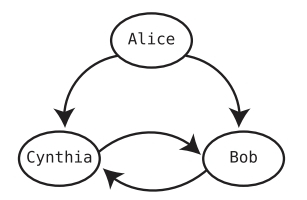

In [ ]:
alice = Vertex("alice")
bob = Vertex("bob")
cynthia = Vertex("cynthia")

alice.add_adjacent_vertex(bob)
alice.add_adjacent_vertex(cynthia)
bob.add_adjacent_vertex(cynthia)
cynthia.add_adjacent_vertex(bob)

To build an undirected graph for the social network (where all friendships are mutual), we can modify our `add_adjacent_vertex` method as follows:

In [ ]:
# vertex in undirected graph
class Vertex:
  def __init__(self, val = 0, neighbors = None):
    self.val = val
    self.neighbors = neighbors if neighbors is not None else []

  def add_adjacent_vertex(self, vertex):
    if vertex in self.neighbors:
      return
    else:  
      self.neighbors.append(vertex)  
      vertex.add_adjacent_vertex(self)

#**Graph Search**

* Searching a graph means getting from one vertex to another. When the graph is connected, search can be used to find any vertex within the entire graph even if we have access to just one random vertex. Graph search can be used to either find a particular vertex, or it can be used to simply traverse the graph. 

* There are two well-known approaches for graph search: *depth-first search* (DFS) and *breadth-first search* (BFS).

* If the graph could have cycles, the key to any graph search algorithm is **keeping track of which vertices we've visited so far**. If we don't do this, we can end up in an infinite cycle. One way to keep track of our visited vertices is by using a hash table. As we visit each vertex, we add the vertex (or its value) as a key in the hash table and assign it an arbitrary value, such as the boolean `True`. If a vertex is in the hash table, it means we've already visited it.

## **Depth-First Search**

1. Start at any random vertex within the graph.
2. Add the curent vertex to the hash table to mark it as having been visited.
3. Iterate through the curent vertex's adjacent vertices.
4. For each vertex, if the adjacent vertex has already been visited, ignore it.
5. If the adjacent vertex has not yet been visited, recursively perform depth-first search on that vertex.

In [ ]:
# depth-first traversal (recursive) - can be used for cyclic graphs 
def dfs_traverse(vertex, visited_vertices = {}):
  visited_vertices[vertex.val] = True
  print(vertex.val)
  for adjacent_vertex in vertex.neighbors:
    if adjacent_vertex.val in visited_vertices:
      continue
    dfs_traverse(adjacent_vertex, visited_vertices)  

In [ ]:
# set up the undirected graph
#            Alice
#   /       /       \        \
# Bob   Candy       Derek -- Elaine
#  |      /            |
# Fred   /           Gina
#  |    /              |
# Helen              Irena

alice = Vertex("Alice")
bob = Vertex("Bob")
candy = Vertex("Candy")
derek = Vertex("Derek")
elaine = Vertex("Elaine")
fred = Vertex("Fred")
helen = Vertex("Helen")
gina = Vertex("Gina")
irena = Vertex("Irena")
alice.add_adjacent_vertex(bob)
alice.add_adjacent_vertex(candy)
alice.add_adjacent_vertex(derek)
alice.add_adjacent_vertex(elaine)
bob.add_adjacent_vertex(fred)
candy.add_adjacent_vertex(helen)
fred.add_adjacent_vertex(helen)
derek.add_adjacent_vertex(elaine)
derek.add_adjacent_vertex(gina)
gina.add_adjacent_vertex(irena)

In [ ]:
dfs_traverse(alice)
# Output: Alice, Bob, Fred, Helen, Candy, Derek, Elaine, Gina, Irena

Alice
Bob
Fred
Helen
Candy
Derek
Elaine
Gina
Irena


## **Breadth-First Search**

Algorithm for breadth-first traversal:

1. Start at any vertex. We'll call this `starting_vertex`.
2. Add `starting_vertex` to the hash table to mark it as having been visited.
3. Add `starting_vertex` to the queue.
4. Start a loop that runs while the queue isn't empty.
5. Within this loop, remove the first vertex from the queue. We'll call this `current_vertex`.
6. Iterate over all the adjacent vertices of `current_vertex`.
7. If the adjacent vertex was already visited, ignore it.
8. If the adjacent vertex has not yet been visited, mark it as visited by adding it to the hash table, and add it to the queue.
9. Repeat this loop (starting from Step 4) until the queue is empty.

### **Implementation of queue using collections.deque**

Queue in Python can be implemented using `deque` class from the `collections` module. Deque is preferred over list in the cases where we need quicker append and pop operations from both the ends of container, as `deque` provides an `O(1)` time complexity for append and pop operations as compared to list which provides `O(n)` time complexity. 

Some of the methods supported by `deque` objects:

* `append(x)` Add `x` to the right side of the deque.

* `appendleft(x)` Add `x` to the left side of the deque.

* `pop()` Remove and return an element from the right side of the deque. If no elements are present, raises an `IndexError`.

* `popleft()` Remove and return an element from the left side of the deque. If no elements are present, raises an `IndexError`.

In [ ]:
# breadth-first traversal
from collections import deque

def bfs_traverse(starting_vertex):
  q = deque()
  visited_vertices = {}
  visited_vertices[starting_vertex.val] = True
  q.append(starting_vertex)

  while q:
    current_vertex = q.popleft()
    print(current_vertex.val)
    for adjacent_vertex in current_vertex.neighbors:
      if adjacent_vertex.val not in visited_vertices:
        visited_vertices[adjacent_vertex.val] = True
        q.append(adjacent_vertex)   

In [ ]:
bfs_traverse(alice)
# Output: Alice, Bob, Candy, Derek, Elaine, Fred, Helen, Gina, Irena

Alice
Bob
Candy
Derek
Elaine
Fred
Helen
Gina
Irena


# Graph representation as a hashmap (adjacency list)

In [ ]:
# store vertices using a hashmap
graph = dict()
for vertex in [alice, bob, candy, derek, elaine, fred, helen, gina, irena]:
  graph[vertex.val] = [v.val for v in vertex.neighbors]
print(graph)  

{'Alice': ['Bob', 'Candy', 'Derek', 'Elaine'], 'Bob': ['Alice', 'Fred'], 'Candy': ['Alice', 'Helen'], 'Derek': ['Alice', 'Elaine', 'Gina'], 'Elaine': ['Alice', 'Derek'], 'Fred': ['Bob', 'Helen'], 'Helen': ['Candy', 'Fred'], 'Gina': ['Derek', 'Irena'], 'Irena': ['Gina']}


In [ ]:
graph = {'Alice': ['Bob', 'Candy', 'Derek', 'Elaine'],
         'Bob': ['Alice', 'Fred'], 
         'Candy': ['Alice', 'Helen'], 
         'Derek': ['Alice', 'Elaine', 'Gina'], 
         'Elaine': ['Alice', 'Derek'], 
         'Fred': ['Bob', 'Helen'],
         'Helen': ['Candy', 'Fred'], 
         'Gina': ['Derek', 'Irena'], 
         'Irena': ['Gina']}

In [ ]:
# depth first traversal (for cyclic graphs)
def depth_first_print(graph, start):
  stack = [start]
  visited = set()
  while stack:
    cur = stack.pop()
    if cur not in visited:
      visited.add(cur)    
      print(cur)
      for neighbor in graph[cur]:
        if neighbor in visited:
          continue
        stack.append(neighbor)         

In [ ]:
depth_first_print(graph=graph, start='Alice')

Alice
Elaine
Derek
Gina
Irena
Candy
Helen
Fred
Bob


In [ ]:
# breadth first traversal (for cyclic graphs)
from collections import deque
def breadth_first_print(graph, start):
  q = deque([start])
  visited = set()
  while q:
    cur = q.popleft()
    if cur not in visited:
      visited.add(cur)  
      print(cur)
      for neighbor in graph[cur]:
        if neighbor in visited:
          continue
        q.append(neighbor)

In [ ]:
breadth_first_print(graph=graph, start='Alice')

Alice
Bob
Candy
Derek
Elaine
Fred
Helen
Gina
Irena


## DFS uses a stack, BFS uses a queue


* **Depth first search (DFS)** uses a stack (Last-In-First-Out) data structure to keep track of the visited vertices and to determine the next vertex to visit. When DFS visits a vertex, it adds it to the top of the stack and explores its neighbors. 
 > If any of the neighbors have not been visited yet, DFS recursively visits them and adds them to the stack. This process continues until all vertices have been visited. Because DFS uses a stack, it visits vertices in a depth-first manner, meaning it visits vertices that are farther away from the starting vertex before visiting the closer ones.

* **Breadth first search (BFS)** uses a queue (First-In-First-Out) data structure to keep track of the visited vertices and to determine the next vertex to visit. When BFS visits a vertex, it adds it to the end of the queue and explores its neighbors. 
>  If any of the neighbors have not been visited yet, BFS visits them and adds them to the end of the queue. This process continues until all vertices have been visited. Because BFS uses a queue, it visits vertices in a breadth-first manner, meaning it visits all vertices at the same depth level before visiting vertices that are deeper in the graph.


* Note that a queue can be generally thought of as horizontal in structure i.e, breadth/width can be attributed to it. Stack is visualized as a vertical structure and hence has depth.

# Directed Graphs

* A graph is directed when its edges have directions (these edges are also called arcs).

* **Topological sort** or **topological ordering** of a directed graph is an ordering of nodes such that every node appears in the ordering before all the nodes it points to. Note that topological ordering is not unique and graphs with cycles do not have topological ordering.


## Kahn's Algorithm (topological order)

* To obtain a topological order, we can use Kahn's algorithm which is very similar to Breadth First Search. The main difference is that **we only push nodes with 0 in-degree into the queue** in topological sort whereas in BFS we push all the neighboring nodes into the queue.

* For this algorithm, we systematically remove one node at a time, each time removing a node such that no other nodes point to that node (in-degree is 0). 

  * If no such node exists, then there must be a cycle, there is no way to order the nodes such that "every node appears in the ordering before all the nodes it points to" (no solution). 
  * After removing the current node, for each neighboring node the current node points to, we check whether any nodes point to this node. 
  * If there isn't any, we push this node into the queue. 
  * Notice it is important to keep track of the number of nodes pointing to a node (in-degree) in the question as we only push the node into the queue once all nodes the current node depended on have been removed. 


* Let's summarize the steps here:

0.   Initialize a hashmap to store the in-degrees.
1.   Go through the nodes, count the in-degree of each node.
2.   Push the nodes with 0 in-degree into the queue.
3.   Pop each node from the queue, subtract 1 from the in-degree of each of its neighbors (each node it points to).
4.   If a node's in-degree drops to 0, then push it into the queue.
5.   Repeat until the queue is empty. If any nodes remain unprocessed, then there must be a cycle.

In [ ]:
from collections import deque

def find_indegree(graph):
    indegree = { node: 0 for node in graph }  
    for node in graph:
        for neighbor in graph[node]:
            indegree[neighbor] += 1
    return indegree


def topo_sort(graph):
    res = []
    q = deque()
    indegree = find_indegree(graph)
    for node in indegree:
        if indegree[node] == 0:
            q.append(node)
    while len(q) > 0:
        node = q.popleft()
        res.append(node)
        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                q.append(neighbor)
    return res if len(graph) == len(res) else None

# **Leetcode 733. Flood Fill** `Easy`

https://leetcode.com/problems/flood-fill/

An image is represented by an `m x n` integer grid image where `image[i][j]` represents the pixel value of the image.

You are also given three integers `sr, sc,` and `color`. You should perform a flood fill on the image starting from the pixel `image[sr][sc]`.

To perform a flood fill, consider the starting pixel, plus any pixels connected 4-directionally to the starting pixel of the same color as the starting pixel, plus any pixels connected 4-directionally to those pixels (also with the same color), and so on. Replace the color of all of the aforementioned pixels with color.

Return the modified image after performing the flood fill.

```
Input: image = [[1,1,1],[1,1,0],[1,0,1]], sr = 1, sc = 1, color = 2
Output: [[2,2,2],[2,2,0],[2,0,1]]
Explanation: From the center of the image with position (sr, sc) = (1, 1) (i.e., the red pixel), 
all pixels connected by a path of the same color as the starting pixel (i.e., the blue pixels) are colored with the new color.
Note the bottom corner is not colored 2, because it is not 4-directionally connected to the starting pixel.
```

In [ ]:
def floodFill(image: list[list[int]], sr: int, sc: int, newColor: int) -> list[list[int]]:
    R, C = len(image), len(image[0])
    color = image[sr][sc]
    if color == newColor: 
        return image

    def dfs(r, c):
        if (r not in range(R)) or (c not in range(C)): return
        if image[r][c] != color: return
        
        image[r][c] = newColor
        
        dfs(r+1, c)
        dfs(r-1, c)
        dfs(r, c+1)
        dfs(r, c-1)
    
    dfs(sr, sc)
    return image

## Time and Space Complexity 



* The time and space complexity of the `floodFill` function depend on the number of elements in the input `image` and the size of the call stack used by the recursive `dfs` function.

* In the worst case, where all elements in the `image` are of the same color, the `dfs` function will visit every element in the image exactly once. Since each element can have up to 4 neighboring elements, the time complexity of the `dfs` function is `O(R*C)`, where `R` and `C` are the dimensions of the input `image`. Therefore, the overall time complexity of the `floodFill` function is also `O(R*C)`, as the `dfs` function is called only once. 

* The space complexity is also `O(R*C)`, as the maximum number of recursive calls on the call stack is proportional to the number of elements in the `image`.

In [ ]:
image = [[1,1,1],[1,1,0],[1,0,1]]
sr = 1
sc = 1
newColor = 2
floodFill(image, sr, sc, newColor)

[[2, 2, 2], [2, 2, 0], [2, 0, 1]]

# **Leetcode 1971. Find if Path Exists in Graph** `Easy`

https://leetcode.com/problems/find-if-path-exists-in-graph/

There is a bi-directional graph with `n` vertices, where each vertex is labeled from 0 to `n - 1` (inclusive). The edges in the graph are represented as a 2D integer array edges, where each `edges[i] = [u_i, v_i]` denotes a bi-directional edge between vertex `u_i` and vertex `v_i`. Every vertex pair is connected by at most one edge, and no vertex has an edge to itself.

You want to determine if there is a valid path that exists from vertex source to vertex destination.

Given edges and the integers `n`, source, and destination, return `true` if there is a valid path from source to destination, or `false` otherwise.

```
Input: n = 3, edges = [[0,1],[1,2],[2,0]], source = 0, destination = 2
Output: true
Explanation: There are two paths from vertex 0 to vertex 2:
- 0 → 1 → 2
- 0 → 2
```

```
Input: n = 6, edges = [[0,1],[0,2],[3,5],[5,4],[4,3]], source = 0, destination = 5
Output: false
Explanation: There is no path from vertex 0 to vertex 5.
```

In [ ]:
import collections
def validPath(n: int, edges: list[list[int]], source: int, destination: int) -> bool:

    graph = collections.defaultdict(list)
    for u, v in edges:
        graph[u].append(v)
        graph[v].append(u)
    
    visited = set([source])
    queue = collections.deque([source])

    while queue:
        cur = queue.popleft()
        if cur == destination:
            return True

        for neighbor in graph[cur]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    
    return False

In [ ]:
n = 3
edges = [[0,1],[1,2],[2,0]]
source = 0
destination = 2
validPath(n, edges, source, destination)

True

In [ ]:
n = 6
edges = [[0,1],[0,2],[3,5],[5,4],[4,3]]
source = 0
destination = 5
validPath(n, edges, source, destination)

False

## Time and Space Complexity



* The `import collections` statement is used to import the Python standard library module `collections`, which provides specialized container data types such as `defaultdict`, `deque`, and `Counter`.

* The time complexity of the `validPath` function depends on the size of the input `n` (number of vertices), the number of edges `m` in the graph, and the distances between the source and destination nodes in the graph.

  - The initialization of the `graph` defaultdict takes `O(m)` time because it requires iterating through all edges and appending nodes to the adjacency list of each node. 
  - The `visited` set and `queue` deque initialization both take constant time. 
  - The while loop runs for at most `n` iterations, since each node is visited at most once, and each iteration performs constant time operations. 
  - The worst-case scenario occurs when the source and destination nodes are not connected, in which case the function returns `False` after traversing the entire graph. Thus, the overall time complexity of the function is `O(m + n)`.

* The space complexity of the `validPath` function depends on the size of the input `n`, the number of edges `m` in the graph, and the maximum size of the `visited` set and `queue` deque during the execution of the while loop.

  - The `graph` defaultdict takes `O(m)` space because it stores the adjacency lists for all nodes. 
  - The `visited` set and `queue` deque both take `O(n)` space in the worst case when all nodes are visited, and the maximum size of `visited` is `n` and the maximum size of `queue` is `n` when the graph is a line. 
  - The overall space complexity of the function is `O(m + n)` because the size of `m` can be as large as `n^2` in the worst case, and thus `m` dominates the space complexity.

# **Leetcode 323. Number of Connected Components in an Undirected Graph** `Medium`

You have a graph of `n` nodes. You are given an integer `n` and an array edges where `edges[i] = [a_i, b_i]` indicates that there is an edge between `a_i` and `b_i` in the graph.

Return the number of connected components in the graph.

```
Input: n = 5, edges = [[0,1],[1,2],[3,4]]
Output: 2
```
```
Input: n = 5, edges = [[0,1],[1,2],[2,3],[3,4]]
Output: 1
```


In [ ]:
import collections
def countComponents(n: int, edges: list[list[int]]) -> int:
    
    # create adjacency map
    graph = collections.defaultdict(list)
    for [u,v] in edges:
        graph[u].append(v)
        graph[v].append(u)
    for i in range(n):
        if i not in graph:
            graph[i] = []
            
    visited = set()   
    
    # depth first - undirected graph
    def dfs(graph, start):    
        stack = [start]
    
        while stack:
            cur = stack.pop()
            visited.add(cur)
            for neighbor in graph[cur]:
                if neighbor not in visited:
                    stack.append(neighbor)
        
    count = 0
    for vertex in graph:
        if vertex not in visited:
            count += 1
            dfs(graph, vertex)
    return count

In [ ]:
n = 5
edges = [[0,1],[1,2],[3,4]]
countComponents(n, edges)

2

## Time and Space Complexity


The time and space complexity of the `countComponents` function can be analyzed as follows:

- Creating the adjacency map takes `O(E)` time, where `E` is the number of edges in the graph.
- Adding missing vertices to the adjacency map takes `O(N)` time, where `N` is the total number of vertices.
- The DFS algorithm is applied to each vertex once, taking `O(V+E)` time, where `V` is the total number of vertices and `E` is the number of edges.
- The space complexity is `O(V+E)`, as we need to keep track of visited vertices and the stack of vertices to be visited during the DFS traversal.

Therefore, the overall time complexity of the method is `O(V+E)`, and the space complexity is also `O(V+E)`.

# **Leetcode 200. Number of Islands** `Medium`

https://leetcode.com/problems/number-of-islands/

Given an `m x n` 2D binary grid `grid` which represents a map of `'1'`s (land) and `'0'`s (water), return the number of islands.

An island is surrounded by water and is formed by connecting adjacent lands horizontally or vertically. You may assume all four edges of the grid are all surrounded by water.
 
```
Input: grid = [
  ["1","1","1","1","0"],
  ["1","1","0","1","0"],
  ["1","1","0","0","0"],
  ["0","0","0","0","0"]
]
Output: 1
```
```
Input: grid = [
  ["1","1","0","0","0"],
  ["1","1","0","0","0"],
  ["0","0","1","0","0"],
  ["0","0","0","1","1"]
]
Output: 3
``` 




In [ ]:
def numIslands(grid: list[list[str]]) -> int:
  if not grid:
    return 0

  islands = 0
  visited = set()  
  rows, cols = len(grid), len(grid[0])
  directions = [[0,1], [0,-1],[1,0], [-1,0]]

  def dfs(r,c):
    if (r not in range(rows) or 
        c not in range(cols) or
        grid[r][c] == "0" or 
        (r,c) in visited):
      return 
    visited.add((r,c))
    for rdir,cdir in directions:
      dfs(r + rdir, c + cdir)
  
  for row in range(rows):
    for col in range(cols):
      if (grid[row][col] == "1" and (row, col) not in visited):
        islands += 1
        dfs(row, col)
  return islands


In [ ]:
grid = [["1","1","0","0","0"],["1","1","0","0","0"],["0","0","1","0","0"],["0","0","0","1","1"]]
numIslands(grid)

3

## Time and Space Complexity


* The time complexity of the `numIslands` function is `O(rows * cols)`, where `rows` and `cols` are the dimensions of the input grid. 

 This is because the function uses a nested loop to iterate over each cell in the grid, and for each cell, it performs a constant amount of work (i.e., a few simple conditional checks) and then calls the `dfs` function, which can visit at most every cell in the grid once. The `dfs` function has a time complexity of `O(1)` per cell, and so its time complexity is also `O(rows * cols)` overall.

* The space complexity of the function is `O(rows * cols)` as well. 

 This is because the function uses a set to keep track of the visited cells, which can have at most `O(rows * cols)` elements if every cell in the grid is visited. The `dfs` function also uses a constant amount of additional space per cell it visits (i.e., the call stack for recursion), but since it visits at most every cell in the grid once, this additional space is also `O(rows * cols)`. Overall, the space complexity of the function is dominated by the set used to store visited cells.

# **Leetcode 1254. Number of Closed Islands** `Medium`

https://leetcode.com/problems/number-of-closed-islands/

Given a 2D grid consists of `0`s (land) and `1`s (water).  An island is a maximal 4-directionally connected group of `0`s and a closed island is an island totally (all left, top, right, bottom) surrounded by `1`s.

Return the number of closed islands.

```
Input: grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
Output: 2
Explanation: 
Islands in gray are closed because they are completely surrounded by water (group of 1s).
```

In [ ]:
def closedIsland(grid: list[list[int]]) -> int:

    islands = 0
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    directions = [[0,1], [0,-1],[1,0], [-1,0]]

    def dfs(r,c, grid, visited):
        if (r not in range(rows) or c not in range(cols)):
            return False
        if grid[r][c] == 1 or visited[r][c]:
            return True
      
        visited[r][c] = True
        closed = True

        for rdir,cdir in directions:
            if not dfs(r + rdir, c + cdir, grid, visited):
                closed = False
        return closed

    for row in range(rows):
        for col in range(cols):
            if (grid[row][col] == 0 and not visited[row][col] and dfs(row, col, grid, visited)):
                islands += 1
    return islands

In [ ]:
grid = [[1,1,1,1,1,1,1,0],[1,0,0,0,0,1,1,0],[1,0,1,0,1,1,1,0],[1,0,0,0,0,1,0,1],[1,1,1,1,1,1,1,0]]
closedIsland(grid)

2

## Time and Space Complexity

* The time complexity is `O(rows * cols)`, where `rows` and `cols` are the dimensions of the input grid.

* The space complexity of the function is `O(rows * cols)` as well. 

# **Leetcode 695. Max Area of Island** `Medium`

https://leetcode.com/problems/max-area-of-island/

You are given an `m x n` binary matrix grid. An island is a group of `1`'s (representing land) connected 4-directionally (horizontal or vertical.) You may assume all four edges of the grid are surrounded by water.

The area of an island is the number of cells with a value `1` in the island.

Return the maximum area of an island in grid. If there is no island, return `0`.

```
Input: grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0],
               [0,1,1,0,1,0,0,0,0,0,0,0,0],
               [0,1,0,0,1,1,0,0,1,0,1,0,0],
               [0,1,0,0,1,1,0,0,1,1,1,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0]]
Output: 6
Explanation: The answer is not 11, because the island must be connected 4-directionally.
```

In [ ]:
def maxAreaOfIsland(grid: list[list[int]]) -> int:

    rows, cols = len(grid), len(grid[0])
    max_size = 0
    visited = set()

    def df_explore(r,c):
        if r not in range(rows) or c not in range(cols):
            return 0   
        if grid[r][c]== 0 or (r,c) in visited:
            return 0

        visited.add((r,c))
        
        size = 1
        size += df_explore(r-1,c)
        size += df_explore(r+1,c)
        size += df_explore(r,c-1)
        size += df_explore(r,c+1)

        return size

    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1 and (i,j) not in visited:
                size = df_explore(i,j)
                if size > max_size:
                    max_size = size

    return max_size

In [ ]:
grid = [[0,0,1,0,0,0,0,1,0,0,0,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0],
               [0,1,1,0,1,0,0,0,0,0,0,0,0],
               [0,1,0,0,1,1,0,0,1,0,1,0,0],
               [0,1,0,0,1,1,0,0,1,1,1,0,0],
               [0,0,0,0,0,0,0,0,0,0,1,0,0],
               [0,0,0,0,0,0,0,1,1,1,0,0,0],
               [0,0,0,0,0,0,0,1,1,0,0,0,0]]
maxAreaOfIsland(grid)

6

## Time and Space Complexity

* The time complexity of the `maxAreaOfIsland` function is `O(rows * cols)`, where `rows` and `cols` are the dimensions of the input grid.

* The space complexity of the function is `O(rows * cols)` as well. 



# **Leetcode 1905. Count Sub Islands** `Medium`

https://leetcode.com/problems/count-sub-islands/

You are given two `m x n` binary matrices `grid1` and `grid2` containing only `0`'s (representing water) and `1`'s (representing land). An island is a group of `1`'s connected 4-directionally (horizontal or vertical). Any cells outside of the grid are considered water cells.

An island in `grid2` is considered a sub-island if there is an island in `grid1` that contains all the cells that make up this island in `grid2`.

Return the number of islands in `grid2` that are considered sub-islands.

```
Input: grid1 = [[1,1,1,0,0],[0,1,1,1,1],[0,0,0,0,0],[1,0,0,0,0],[1,1,0,1,1]], grid2 = [[1,1,1,0,0],[0,0,1,1,1],[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0]]
Output: 3
Explanation: In the picture above, the grid on the left is grid1 and the grid on the right is grid2.
The 1s colored red in grid2 are those considered to be part of a sub-island. There are three sub-islands.
```

In [ ]:
def countSubIslands(grid1: list[list[int]], grid2: list[list[int]]) -> int:
    visited = set()  
    rows, cols = len(grid1), len(grid1[0])
    directions = [[0,1], [0,-1],[1,0], [-1,0]]

    def dfs(r,c):
        if (r not in range(rows) or 
            c not in range(cols) or
            grid2[r][c] == 0  or
            (r,c) in visited):return True
        
        visited.add((r,c))    
        res = True  
        if grid1[r][c] == 0: res = False 
        
        for rdir,cdir in directions:
            res = dfs(r + rdir, c + cdir) and res
        return res
    
    subislands = 0
    for r in range(rows):
        for c in range(cols):
            if grid2[r][c] and (r, c) not in visited and dfs(r,c):
                subislands += 1
    return subislands

In [ ]:
grid1 = [[1,1,1,0,0],[0,1,1,1,1],[0,0,0,0,0],[1,0,0,0,0],[1,1,0,1,1]]
grid2 = [[1,1,1,0,0],[0,0,1,1,1],[0,1,0,0,0],[1,0,1,1,0],[0,1,0,1,0]]
countSubIslands(grid1, grid2)

3

## Time and Space Complexity

* Time complexity: `O(rows * cols)`, where `rows` and `cols` are the dimensions of the input grid.

* Space complexity: `O(rows * cols)`.

# **Leetcode 1020. Number of Enclaves** `Medium`

https://leetcode.com/problems/number-of-enclaves/

You are given an `m x n` binary matrix grid, where `0` represents a sea cell and `1` represents a land cell.

A move consists of walking from one land cell to another adjacent (4-directionally) land cell or walking off the boundary of the grid.

Return the number of land cells in grid for which we cannot walk off the boundary of the grid in any number of moves.

```
Input: grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
Output: 3
Explanation: There are three 1s that are enclosed by 0s, and one 1 that is not enclosed because its on the boundary.
```
```
Input: grid = [[0,1,1,0],[0,0,1,0],[0,0,1,0],[0,0,0,0]]
Output: 0
Explanation: All 1s are either on the boundary or can reach the boundary.
```

In [ ]:
def numEnclaves(grid: list[list[int]]) -> int:
    """
    If we begin to traverse from the land cells on the boundary 
    and keep on traversing as long as we can, we will visit all 
    the land cells from which we can reach the boundary.
    The land cells which aren't visited will be the ones from 
    which we   cannot reach the boundary in any way. 
    The count of all these unvisited land cells would be our answer.
    """
    rows, cols = len(grid), len(grid[0])
    visited = [[False for _ in range(cols)] for _ in range(rows)]
    directions = [[0,1], [0,-1],[1,0], [-1,0]]

    def dfs(r,c, grid, visited):
        if (r not in range(rows) or c not in range(cols) or grid[r][c] == 0 or visited[r][c]) :
            return 

        visited[r][c] = True

        for rdir,cdir in directions:
            dfs(r + rdir, c + cdir, grid, visited)
        return 

    for i in range(rows):
        if grid[i][0] == 1 and not visited[i][0]:
            dfs(i, 0, grid, visited)
        if grid[i][cols - 1] == 1 and not visited[i][cols - 1]:
            dfs(i, cols - 1, grid, visited) 
    for j in range(cols):
        if grid[0][j] == 1 and not visited[0][j]:
            dfs(0, j, grid, visited)
        if grid[rows - 1][j] == 1 and not visited[rows - 1][j]:
            dfs(rows - 1, j, grid, visited) 
              
    enclaves = 0
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == 1 and not visited[i][j]:
                enclaves += 1
    return enclaves 

In [ ]:
grid = [[0,0,0,0],[1,0,1,0],[0,1,1,0],[0,0,0,0]]
numEnclaves(grid)

3

# **Leetcode 1162. As Far from Land as Possible** `Medium`

https://leetcode.com/problems/as-far-from-land-as-possible/

Given an `n x n` grid containing only values `0` and `1`, where `0` represents water and `1` represents land, find a water cell such that its distance to the nearest land cell is maximized, and return the distance. If no land or water exists in the grid, return `-1`.

The distance used in this problem is the Manhattan distance: the distance between two cells `(x0, y0)` and (x1, y1)` is `|x0 - x1| + |y0 - y1|`.

```
Input: grid = [[1,0,1],[0,0,0],[1,0,1]]
Output: 2
Explanation: The cell (1, 1) is as far as possible from all the land with distance 2.
```

```
Input: grid = [[1,0,0],[0,0,0],[0,0,0]]
Output: 4
Explanation: The cell (2, 2) is as far as possible from all the land with distance 4.
```

In [2]:
from collections import deque

def maxDistance(grid: list[list[int]]) -> int:
    distance = -1
    directions = [[1,0], [-1,0], [0,1], [0,-1]]
    n = len(grid)
    queue = deque([])
    
    for i in range(n):
        for j in range(n):
            if grid[i][j] == 1:
                queue.append((i,j))

    if len(queue) == n**2 or len(queue) == 0: 
        return -1

    while queue:
        q = len(queue)
        for _ in range(q):
            cur = queue.popleft()

            for rdir,cdir in directions:
                x = cur[0] + rdir
                y = cur[1] + cdir
                if (0<=x<n and 0<=y<n and grid[x][y] == 0):
                    queue.append((x,y))
                    grid[x][y] = 1     
        distance += 1
    return distance   

In [3]:
grid = [[1,0,1],[0,0,0],[1,0,1]]
maxDistance(grid)

2

## Time and Space Complexity

* The time complexity of the given function `maxDistance` is `O(n^2)` where `n` is the length of the given grid. 
  
  This is because the function has two nested loops that iterate over all the elements of the grid, and for each element, the function performs a constant amount of work.

* The space complexity of the function is also `O(n^2)`, because in the worst-case scenario, all the elements of the grid are equal to 1, and the queue will contain all `n^2` elements of the grid. In addition, the function uses a constant amount of additional space for variables like `directions`, `n`, and `distance`. 

  However, note that the worst-case scenario is unlikely to happen in practice, since the function returns -1 if all elements are 1, or if there are no elements equal to 1. Therefore, the actual space complexity of the function will depend on the size and distribution of the 0 and 1 elements in the grid.

# **Leetcode 994. Rotting Oranges** `Medium`

https://leetcode.com/problems/rotting-oranges/

You are given an `m x n` grid where each cell can have one of three values:

* `0` representing an empty cell,
* `1` representing a fresh orange, or
* `2` representing a rotten orange.

Every minute, any fresh orange that is 4-directionally adjacent to a rotten orange becomes rotten.

Return the minimum number of minutes that must elapse until no cell has a fresh orange. If this is impossible, return `-1`.

```
Input: grid = [[2,1,1],[1,1,0],[0,1,1]]
Output: 4
```
```
Input: grid = [[2,1,1],[0,1,1],[1,0,1]]
Output: -1
Explanation: The orange in the bottom left corner (row 2, column 0) is never rotten, because rotting only happens 4-directionally.
```

In [5]:
from collections import deque
def orangesRotting(grid: list[list[int]]) -> int:
    
    directions = [[1,0], [-1,0], [0,1], [0,-1]]
    m, n = len(grid), len(grid[0])
    rotten = deque([])
    time, fresh = 0, 0
    
    for i in range(m):
        for j in range(n):
            if grid[i][j] == 2:
                rotten.append((i,j))
            elif grid[i][j] == 1:
                fresh += 1    

    while rotten and fresh:
        time += 1
        q = len(rotten)
        for _ in range(q):
            cur = rotten.popleft()
            for rdir,cdir in directions:
                x = cur[0] + rdir
                y = cur[1] + cdir
                if not (0<=x<m and 0<=y<n):
                  continue
                if grid[x][y] == 0 or grid[x][y] == 2:
                  continue
                fresh -= 1       
                grid[x][y] = 2 
        
                rotten.append((x,y))
        
    return time if fresh == 0 else -1

In [6]:
grid = [[2,1,1],[1,1,0],[0,1,1]]
orangesRotting(grid)

4

## Time and Space Complexity


* The time complexity of the `orangesRotting` function is `O(m*n)` where `m` and `n` are the dimensions of the input grid. 

 This is because the function iterates over all the cells in the grid once to find the rotten and fresh oranges, and then it uses a breadth-first search (BFS) algorithm to update the status of the oranges. In the worst case scenario, all the cells in the grid need to be visited twice (once to find the rotten and fresh oranges, and once during the BFS), which gives us a time complexity of `O(m*n)`.

* The space complexity of the function is also `O(m*n)`. 
  
  This is because we use a deque data structure to store the rotten oranges, which can contain at most `m*n` elements in the worst case scenario. Additionally, we store the number of fresh oranges and the time taken to rot all the oranges, both of which require `O(1)` space.



# **Leetcode 133. Clone Graph** `Medium`

Given a reference of a node in a connected undirected graph.

Return a deep copy (clone) of the graph.

Each node in the graph contains a value (int) and a list (List[Node]) of its neighbors.

Test case format:

For simplicity, each node's value is the same as the node's index (1-indexed). For example, the first node with `val == 1`, the second node with `val == 2`, and so on. The graph is represented in the test case using an adjacency list.

An adjacency list is a collection of unordered lists used to represent a finite graph. Each list describes the set of neighbors of a node in the graph.

The given node will always be the first node with val = 1. You must return the copy of the given node as a reference to the cloned graph.

In [ ]:
from collections import deque
class Node:
    def __init__(self, val = 0, neighbors = None):
        self.val = val
        self.neighbors = neighbors if neighbors is not None else []

def cloneGraph(self, node: 'Node') -> 'Node':
    if node is None:
        return None
    
    vertex_map = {node: Node(node.val)}
    
    q = deque([node])
    
    while q:
        current_vertex = q.popleft()
        for adjacent_vertex in current_vertex.neighbors:
            if adjacent_vertex not in vertex_map:
                vertex_map[adjacent_vertex] = Node(adjacent_vertex.val)
                q.append(adjacent_vertex)   
            vertex_map[current_vertex].neighbors.append(vertex_map[adjacent_vertex])
    
    return vertex_map[node]

# **Leetcode 207. Course Schedule** `Medium`

https://leetcode.com/problems/course-schedule/

There are a total of `numCourses` courses you have to take, labeled from `0` to `numCourses - 1`. You are given an array prerequisites where `prerequisites[i] = [a_i, b_i]` indicates that you must take course `b_i` first if you want to take course `a_i`.

For example, the pair `[0, 1]`, indicates that to take course 0 you have to first take course 1.
Return `true` if you can finish all courses. Otherwise, return `false`.

```
Input: numCourses = 2, prerequisites = [[1,0]]
Output: true
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0. So it is possible.
```
```
Input: numCourses = 2, prerequisites = [[1,0],[0,1]]
Output: false
Explanation: There are a total of 2 courses to take. 
To take course 1 you should have finished course 0, and to take course 0 you should also have finished course 1. So it is impossible.
```


In [ ]:
from collections import defaultdict, deque

def canFinish(numCourses: int, prerequisites: list[list[int]]) -> bool:
  
    graph = defaultdict(list)
    indegree = [0] * numCourses

    for course, prereq in prerequisites:
        graph[prereq].append(course)
        indegree[course] += 1
      
    q = deque()
    for course in range(numCourses):
        if indegree[course] == 0:
            q.append(course)

    visited = 0        
    while q:
        node = q.popleft()
        visited += 1
        for neighbor in graph[node]:
            indegree[neighbor] -= 1
            if indegree[neighbor] == 0:
                q.append(neighbor)

    return visited == numCourses

In [ ]:
numCourses = 2
prerequisites = [[1,0],[0,1]]
canFinish(numCourses, prerequisites)

False

## Time and Space Complexity


* The time complexity of this solution is `O(N + E)`, where `N` is the number of courses and `E` is the number of prerequisites:

   * The loop that builds the adjacency list and calculates the in-degree has a time complexity of `O(E)`, while the loop that traverses the graph has a time complexity of `O(N + E)` since we may visit all nodes and edges. The time complexity of creating the deque is `O(1)`.

* The space complexity of this solution is `O(N + E)`:

  * The adjacency list requires `O(E)` space, the in-degree list requires `O(N)` space, and the deque requires `O(N)` space in the worst-case scenario where all nodes have an in-degree of 0 and are added to the queue.
